In [121]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load Data

In [67]:
data = pd.read_csv("gender_voice.csv")
data = data.values
Y = np.zeros((len(data), 2))
Y[np.where(data[:, -1] == 'male')] = [1, 0]
Y[np.where(data[:, -1] == 'female')] = [0, 1]
Y = np.array(Y)
data = data[:, :-1].astype(np.float)

/tmp/ipykernel_152887/3987985478.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data[:, :-1].astype(np.float)


In [68]:
print(data.shape)
print(Y.shape)

(3168, 20)
(3168, 2)


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.2)

In [98]:
print("Train Data Shape: ", X_train.shape)
print("Train Y Shape: ", Y_train.shape)
print("Test Data Shape: ", X_test.shape)
print("Test Y Shape: ", Y_test.shape)

Train Data Shape:  (2534, 20)
Train Y Shape:  (2534, 2)
Test Data Shape:  (634, 20)
Test Y Shape:  (634, 2)


In [99]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X_train = torch.tensor(list(X_train)).float().to(device)
Y_train = torch.tensor(list(Y_train)).float().to(device)
X_test = torch.tensor(list(X_test)).float().to(device)
Y_test = torch.tensor(list(Y_test)).float().to(device)

In [158]:
n_class = 2
n = X_train.shape[0]
d = X_train.shape[1]

model = torch.nn.Sequential(
    torch.nn.Linear(d, 120),
    torch.nn.ReLU(),
    torch.nn.Linear(120, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, n_class),
    torch.nn.Sigmoid(),
)
model.to(device)

loss_function = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

epochs = 1000
error_list = []
for epoch in range(epochs):
    optimizer.zero_grad()
    Y_pred = model(X_train)
    loss_value = loss_function(Y_pred, Y_train)
    loss_value.backward()
    optimizer.step()
    error_list.append(loss_value.item())

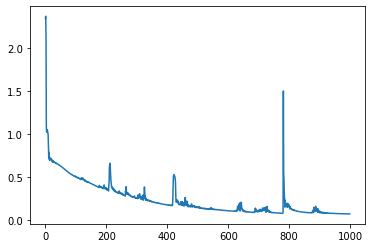

In [159]:
plt.plot(error_list)

In [160]:
print("Train Accuracy",
      accuracy_score(torch.argmax(Y_train, dim=1).cpu().numpy(), torch.argmax(model(X_train), dim=1).cpu().numpy()))
print("Test Accuracy",
      accuracy_score(torch.argmax(Y_test, dim=1).cpu().numpy(), torch.argmax(model(X_test), dim=1).cpu().numpy()))

Train Accuracy 0.9755327545382794
Test Accuracy 0.9621451104100947


In [182]:
a = [1, 4, 0, 8, 0, 6, 0, 7, 0, 6, 0, 5]


def q_sort(a, i=None, j=None):
    if i == None or j == None:
        i = 0
        j = len(a)
    if j - i == 0:
        return [a[i]]
    if i < j:
        for k in range(i + 1, j):
            if a[k] <= a[i]:
                a[i], a[i + 1], a[k] = a[k], a[i], a[i + 1]
                print(a[k], a[i])
                i += 1

        a = q_sort(a, 0, i)
        a = q_sort(a, i + 1, len(a))
        return a
    else:
        return a


q_sort(a)

4 0
4 0
8 0
4 0
6 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


IndexError: list index out of range